<h2>Objetivos de aprendizaje</h2>
<ul>
  <li>Aplicar <code>RandomForestRegressor</code> y <code>Support Vector Machines</code> en problemas reales.</li>
  <li>Implementar técnicas de búsqueda de hiperparámetros.</li>
  <li>Evaluar y comparar el rendimiento de diferentes modelos.</li>
  <li>Desarrollar habilidades en preprocesamiento y <em>feature engineering</em>.</li>
</ul>

<h2>Instrucciones generales</h2>
<ul>
  <li>Trabajar en equipos.</li>
  <li>Pueden usar Python (<code>scikit-learn</code>) o Julia (<code>MLJ.jl</code>, <code>DecisionTree.jl</code>).</li>
  <li>Entregar un reporte en un notebook, con código y comentarios.</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

<h2>Random Forest Regressor</h2>
<h3>Dataset: Precios de Viviendas</h3>
<p>Usar el dataset <strong>California Housing</strong> disponible en scikit-learn o equivalente en Julia.</p>
<ol>
  <li><strong>Análisis exploratorio</strong>
    <ul>
      <li>Estadísticas descriptivas del dataset.</li>
      <li>Visualización de relaciones entre variables.</li>
      <li>Detección de valores atípicos.</li>
    </ul>
  </li>
  <li><strong>Preprocesamiento</strong>
    <ul>
      <li>Manejo de valores faltantes.</li>
      <li>Escalado de características.</li>
      <li>División train/test (80/20).</li>
    </ul>
  </li>
  <li><strong>Random Forest con búsqueda de hiperparámetros</strong>
    <ul>
      <li>Implementar <code>GridSearchCV</code> o <code>RandomizedSearchCV</code>.</li>
      <li>Hiperparámetros a optimizar:
        <ul>
          <li> $n_{\text{estimators}} = [100, 200, 500]$ </li>
          <li>$\text{max\_depth} = [10, 20, \text{None}]$</li>
          <li>$\text{min\_samples\_split} = [2, 5, 10]$</li>
          <li>$\text{max\_features} = ['auto', 'sqrt', 'log2']$</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><strong>Evaluación y análisis</strong>
    <ul>
      <li> $MSE$ y $R^2$ en conjunto de test.</li>
      <li>Importancia de características.</li>
      <li>Análisis de curvas de aprendizaje.</li>
    </ul>
  </li>
</ol>

<ul>
  <li> $ MSE $ y $R^2$ en conjunto de test.</li>
  <li>Importancia de características.</li>
  <li>Análisis de curvas de aprendizaje.</li>
</ul>

In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

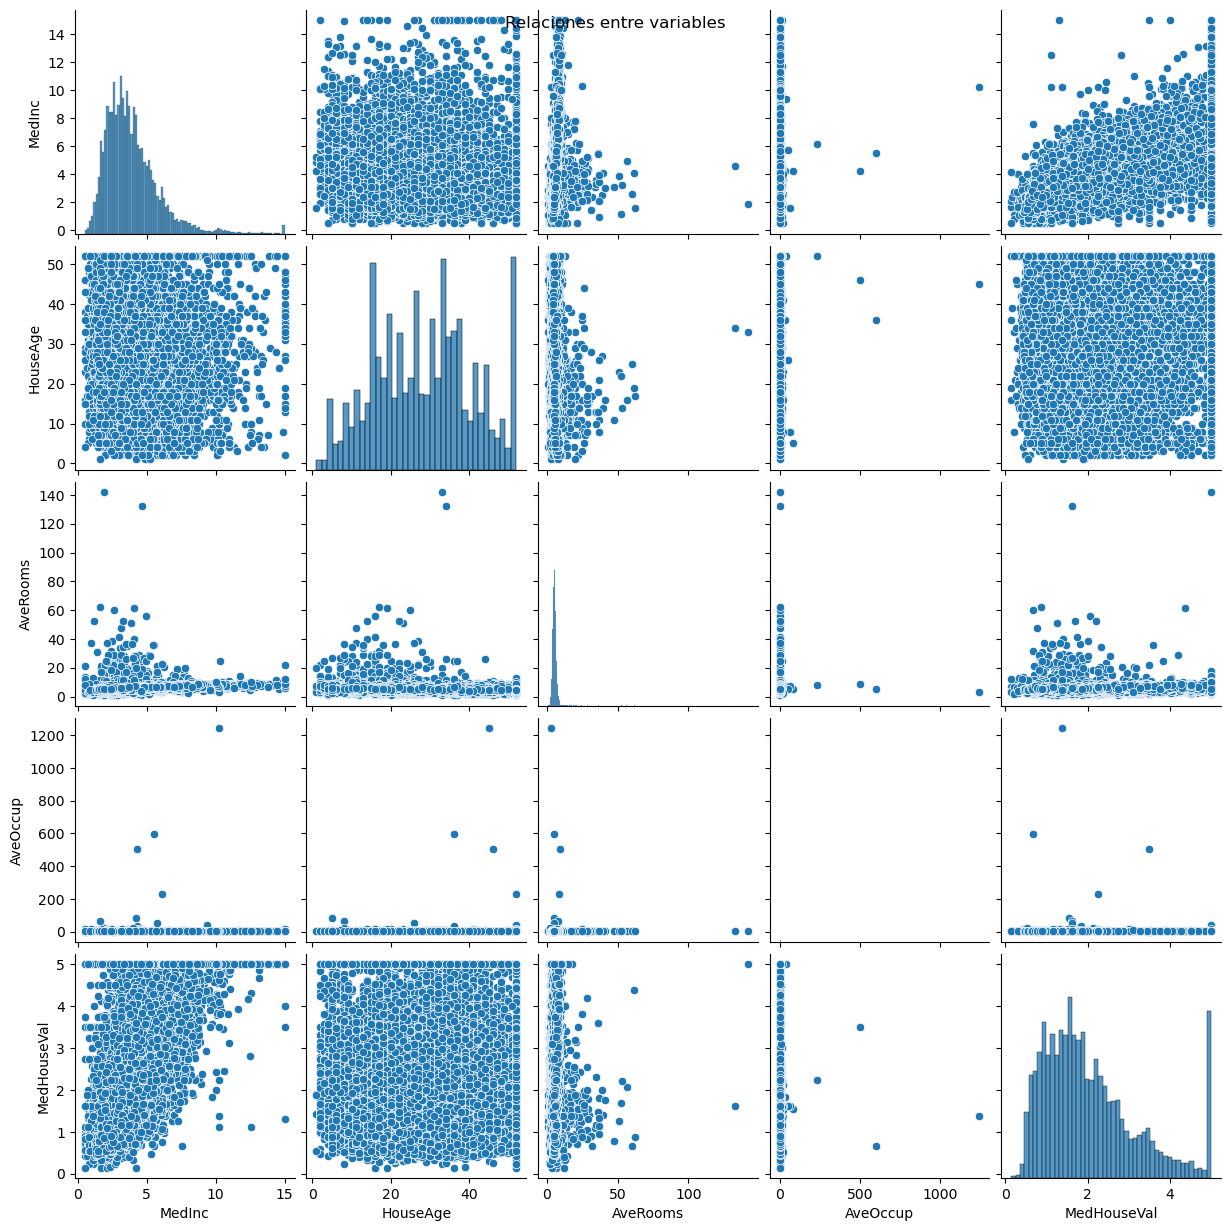

In [7]:
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.suptitle("Relaciones entre variables")
plt.show()

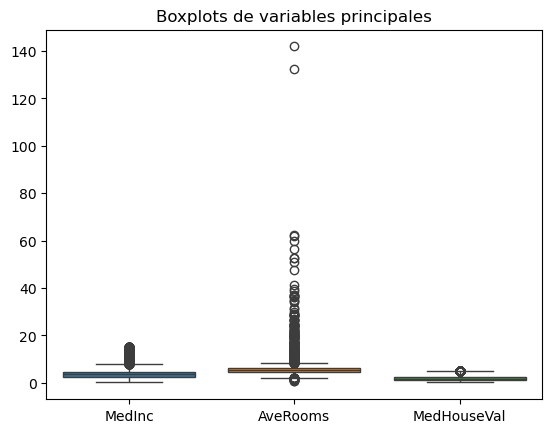

In [8]:
sns.boxplot(data=df[['MedInc', 'AveRooms', 'MedHouseVal']])
plt.title("Boxplots de variables principales")
plt.show()

In [9]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    cv=3, scoring='r2', n_jobs=-1, verbose=1)

grid.fit(X_train_scaled, y_train)

print("\nMejores hiperparámetros:", grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/home/sdg/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sdg/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sdg/.local/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/sdg/.local/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/sdg/.local/lib/python3.1


Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500}



MSE en test: 0.239
R² en test: 0.818


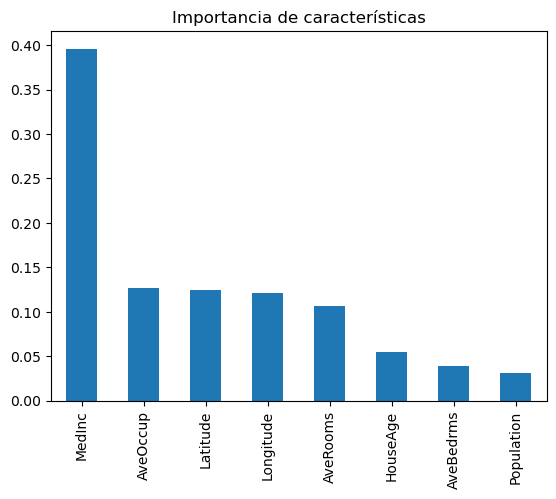

In [10]:
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE en test: {mse:.3f}")
print(f"R² en test: {r2:.3f}")

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='Importancia de características')
plt.show()

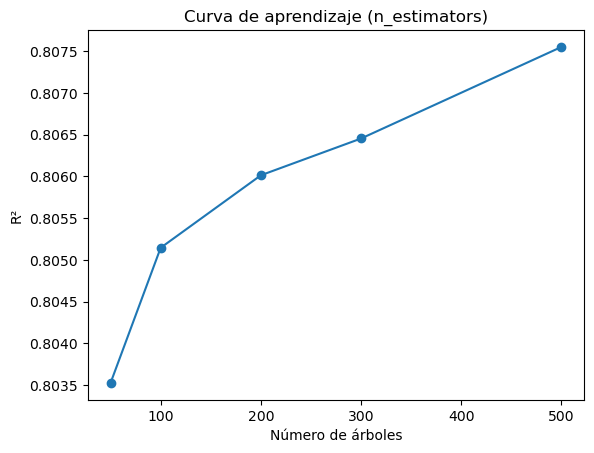

In [11]:
n_trees = [50, 100, 200, 300, 500]
scores = []

for n in n_trees:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

plt.plot(n_trees, scores, marker='o')
plt.title("Curva de aprendizaje (n_estimators)")
plt.xlabel("Número de árboles")
plt.ylabel("R²")
plt.show()

<h2>SVM para Clasificación</h2>
<h3>Dataset: Clasificación de Calidad de Vino</h3>
<p>Usar el <em>Wine Quality Dataset</em> de UCI.</p>

<p><code>url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"</code></p>

<strong>Tareas específicas:</strong>
<ol>
  <li><strong>Análisis exploratorio</strong>
    <ul>
      <li>Estadísticas descriptivas del dataset.</li>
      <li>Visualización de relaciones entre variables.</li>
      <li>Detección de valores atípicos.</li>
    </ul>
  </li>
  <li><strong>Preprocesamiento</strong>
    <ul>
      <li>Transformar a problema binario ($\text{calidad} \ge 7 \rightarrow \text{"bueno"}$, de lo contrario → "regular").</li>
      <li>División train/test (80/20).</li>
    </ul>
  </li>
  <li><strong>SVM con búsqueda de hiperparámetros</strong>
    <ul>
      <li>Implementar <code>GridSearchCV</code>.</li>
      <li>Hiperparámetros a optimizar:
        <ul>
          <li>$ C = [0.1, 1, 10, 100] $</li>
          <li>$ \text{kernel} = ['linear', 'rbf', 'poly'] $</li>
          <li>$\gamma = ['scale', 'auto', 0.1, 1]$</li>
          <li>$\text{degree} = [2, 3, 4]$ (para kernel poly)</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><strong>Evaluación y análisis</strong>
    <ul>
      <li>Matriz de confusión y métricas ($\text{precision}$, $\text{recall}$, $F_1$).</li>
    </ul>
  </li>
</ol>

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, sep=';')

print(wine.head())
print("\nEstadísticas descriptivas:")
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

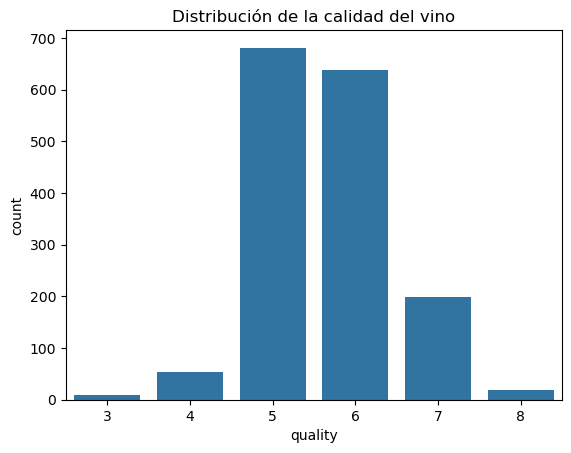

In [13]:
sns.countplot(x='quality', data=wine)
plt.title("Distribución de la calidad del vino")
plt.show()

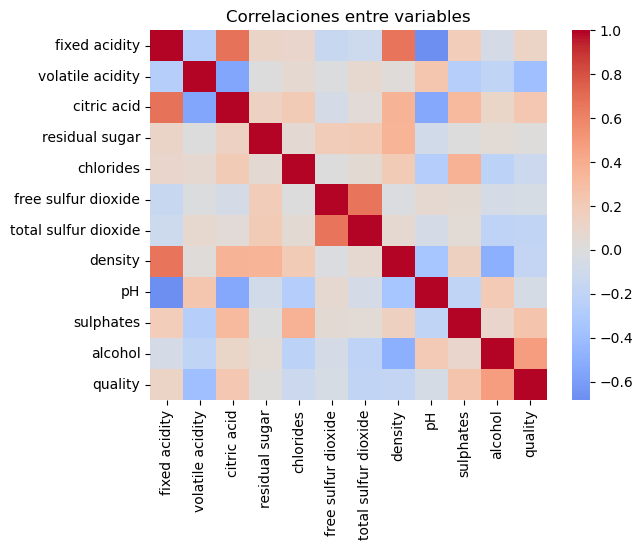

In [14]:
sns.heatmap(wine.corr(), cmap='coolwarm', center=0)
plt.title("Correlaciones entre variables")
plt.show()

In [15]:
wine['label'] = (wine['quality'] >= 7).astype(int)  # 1 = bueno, 0 = regular

X = wine.drop(columns=['quality', 'label'])
y = wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

svc = SVC()

grid = GridSearchCV(svc, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("\nMejores hiperparámetros:", grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits

Mejores hiperparámetros: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


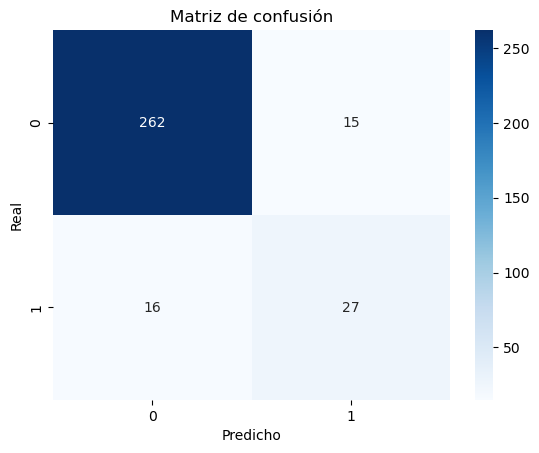

In [18]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [19]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))


Reporte de clasificación:
               precision    recall  f1-score   support

           0      0.942     0.946     0.944       277
           1      0.643     0.628     0.635        43

    accuracy                          0.903       320
   macro avg      0.793     0.787     0.790       320
weighted avg      0.902     0.903     0.903       320

